In [1]:
import numpy as np
import matplotlib.pyplot as plt

# TDA of CNN 

The purpose of this notebook is to study Carlsson's program: Topological Data Analysis of neural networks, CNN in particular. There are several version of papers by Carsson et al. We mainly use 
[C] https://arxiv.org/pdf/1810.03234.pdf 

Now let $\mathcal{M}$ denote $3 \times 3$ patches (intensity values of 9-pixels or weights of CNN) of an image. Considering these patches as 9-vector we see $\mathcal{M} \subset \mathbb{R}^9 $ 

## Manifold structure of $\mathcal{M}$ 

In a remarkable investigation following empirical observation, Mumford et al. gave a metric on $\mathcal{M}$ by 
embedding it in $S^7$. We follow [M]
https://dash.harvard.edu/bitstream/handle/1/3637108/Mumford_NonlinStatPatches.pdf?sequence=1

First, [M] gives D-norm, $\lVert\ \rVert_D$, using geometry of $3 \times 3$ patch:

In [2]:
D = np.array([[2,-1,0,-1,0,0,0,0,0],[-1,3,-1,0,-1,0,0,0,0],[0,-1,2,0,0,-1,0,0,0],\
              [-1,0,0,3,-1,0,-1,0,0],[0,-1,0,-1,4,-1,0,-1,0],[0,0,-1,0,-1,3,0,0,-1],\
              [0,0,0,-1,0,0,2,-1,0],[0,0,0,0,-1,0,-1,3,-1],[0,0,0,0,0,-1,0,-1,2]])

# M-eq(3) 
# make sure p has shape (3,3) or (9,)
def d_norm(p):
    if p.shape==(3,3):
        p = np.transpose(p).flatten()
    
    pxD = np.matmul(p, D)
    d = np.matmul(pxD, np.transpose(p)) 
    d = np.sqrt(d)
    
    return d 

Normalize $\mathbf{x} \in \mathcal{M}$ by subtracting the mean and embed $\mathcal{M}$ in 7-ellipsoid $\tilde{S}^7$
$$ \mathcal{M} \subset \tilde{S}^7 \subset \mathbb{R}^9$$ 

In [3]:
# M-eq(1) 
# make sure q has shape (3,3) or (9,)
def to_7ellip(q):
    if q.shape==(3,3):
        q = np.transpose(q).flatten()
    diff = q - np.sum(q)/9
    normalized_diff = diff / d_norm(diff)

    return normalized_diff

[M] provides a basis $\mathcal{MB} = \{ \mathbf{e}_1, \dots ,\mathbf{e}_8 \}$ of $\mathbb{R}^8$

In [4]:
# mumford basis
e1 = np.array([[1,1,1], [0,0,0], [-1,-1,-1]])
e2 = np.array([[1,0,-1], [1,0,-1], [1,0,-1]])

e3 = np.array([[1,1,1], [-2,-2,-2], [1,1,1]])
e4 = np.array([[1,-2,1], [1,-2,1], [1,-2,1]])

e5 = np.array([[1,0,-1], [0,0,0], [-1,0,1]])
e6 = np.array([[1,-2,1], [0,0,0], [-1,2,-1]])

e7 = np.array([[1,0,-1], [-2,0,2], [1,0,-1]])
e8 = np.array([[1,-2,1], [-2,4,-2], [1,-2,1]])

e1 = e1/np.sqrt(6)
e2 = e2/np.sqrt(6)
e3 = e3/np.sqrt(54)
e4 = e4/np.sqrt(54)
e5 = e5/np.sqrt(8)
e6 = e6/np.sqrt(48)
e7 = e7/np.sqrt(48)
e8 = e8/np.sqrt(216)

#flattened e_i
ef1 = np.transpose(e1).flatten(); ef2 = np.transpose(e2).flatten(); ef3 = np.transpose(e3).flatten()
ef4 = np.transpose(e4).flatten(); ef5 = np.transpose(e5).flatten(); ef6 = np.transpose(e6).flatten()
ef7 = np.transpose(e7).flatten(); ef8 = np.transpose(e8).flatten(); 

With respect to $\mathcal{MB}$, that is, after change of basis transform, we embed $\mathcal{M}$ in 7-sphere:
$$ \mathcal{M} \subset S^7 \subset \mathbb{R}^8$$ 

In [5]:
A = np.stack((ef1,ef2,ef3,ef4,ef5,ef6,ef7,ef8), axis=1)
#A.shape

Lamb = np.diagflat([1/np.sum(ef1**2), 1/np.sum(ef2**2), 1/np.sum(ef3**2), 1/np.sum(ef4**2), \
                    1/np.sum(ef5**2), 1/np.sum(ef6**2), 1/np.sum(ef7**2), 1/np.sum(ef8**2)]) 
#Lamb.shape

# normalized change of basis matrix
B = np.matmul(Lamb, np.transpose(A))

# M-eq(7)
# make sure p has shape (3,3) or (9,)
def to_7sphere(p):
    return np.matmul(B, to_7ellip(p))

After embedding in $S^7$ we have a natural metric: the angle between 2 unit vectors in $S^7$. We call this metric Mumford-metric.

In [6]:
# M-eq(9)
# make sure p1, p2 has shape (3,3) or (9,)
def mumford_metric(p1, p2):
    v1 = to_7sphere(p1)
    v2 = to_7sphere(p2)
    
    return np.arccos(np.dot(v1,v2))

Now mumford-metric gives a manifold structure on $\mathcal{M}$ inherited from $S^7$.

## TDA
Now with geometry in hand, we can apply TDA tools to investigate geometry of patches, or weight parameters occurring in training of CNN.

In [7]:
hh=0.99; h=0.75; mm=0.5; l=0.25; ll=0.

# Will need a cleverer way to this than manually for general cases.
# primary patch in 3x3 form, to graph easily.
pp1 = np.array([[ll,mm,hh],[ll,mm,hh],[ll,mm,hh]])
# primary cirle in S^7
pc1 = to_7sphere(pp1)

pp2 = np.array([[mm,h,hh],[l,mm,h],[ll,l,mm]])
pc2 = to_7sphere(pp2)
pp3 = np.array([[hh,hh,hh],[mm,mm,mm],[ll,ll,ll]])
pc3 = to_7sphere(pp3)
pp4 = np.flip(pp2,1)
pc4 = to_7sphere(pp4)
pp5 = np.flip(pp1,1)
pc5 = to_7sphere(pp5)
pp6 = np.transpose(pp2)
pc6 = to_7sphere(pp6)
pp7 = np.flip(pp3,0)
pc7 = to_7sphere(pp7)
pp8 = np.flip(pp6,1)
pc8 = to_7sphere(pp8)

# patch secondary red
psr1 = pp1 
psr2 = np.array([[ll,hh,mm],[ll,hh,mm],[ll,hh,mm]])
psr3 = np.array([[ll,hh,ll],[ll,hh,ll],[ll,hh,ll]])
psr4 = np.flip(psr2,1)
psr5 = np.flip(psr1,1) # = pp5
psr6 = np.array([[hh,ll,mm],[hh,ll,mm],[hh,ll,mm]])
psr7 = np.array([[hh,ll,hh],[hh,ll,hh],[hh,ll,hh]])
psr8 = np.flip(psr6,1)

# patch secondary green
psg1 = np.array([[hh,hh,hh],[ll,ll,ll],[hh,hh,hh]])
psg2 = np.array([[hh,hh,hh],[ll,ll,ll],[mm,mm,mm]])
psg3 = np.array([[hh,hh,hh],[mm,mm,mm],[ll,ll,ll]]) # = pp3
psg4 = np.array([[mm,mm,mm],[hh,hh,hh],[ll,ll,ll]])
psg5 = np.array([[ll,ll,ll],[hh,hh,hh],[ll,ll,ll]])
psg6 = np.flip(psg4,0)
psg7 = np.flip(psg3,0) # = pp7
psg8 = np.flip(psg1,0)

pps = np.array([pp1, pp2, pp3, pp4, pp5, pp6, pp7, pp8]) #pps.shape = (8,3,3)
pc = np.array([pc1, pc2, pc3, pc4, pc5, pc6, pc7, pc8]) #pc.shape = (8,8)

psrs = np.array([psr1,psr2,psr3,psr4,psr5,psr6,psr7,psr8])
psgs = np.array([psg1,psg2,psg3,psg4,psg5,psg6,psg7,psg8])

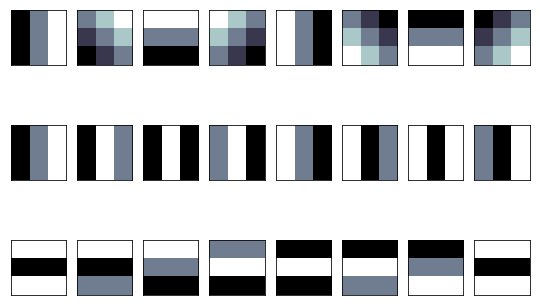

In [8]:
fig, ((ax11,ax12,ax13,ax14,ax15,ax16,ax17,ax18), \
      (ax21,ax22,ax23,ax24,ax25,ax26,ax27,ax28), \
      (ax31,ax32,ax33,ax34,ax35,ax36,ax37,ax38)) =\
                                  plt.subplots(nrows=3, ncols=8, figsize=(9.3, 6),\
                                  subplot_kw={'xticks': [], 'yticks': []} )

c_scheme = plt.cm.bone

ax_p = iter([ax11,ax12,ax13,ax14,ax15,ax16,ax17,ax18])
for i in range(8):
    next(ax_p).imshow(pps[i], cmap=c_scheme) 
    
ax_sr = iter([ax21,ax22,ax23,ax24,ax25,ax26,ax27,ax28]) 
for i in range(8):
    next(ax_sr).imshow(psrs[i], cmap=c_scheme) 

ax_sg = iter([ax31,ax32,ax33,ax34,ax35,ax36,ax37,ax38])
for i in range(8):
    next(ax_sg).imshow(psgs[i], cmap=c_scheme) 

In [ ]:
# inspect

#for x in psgs:
#    y = to_7ellip(x)
#    print(y)
#    print('expect 0: ', int(np.sum(y)))
#    print('expect about 1: ', np.sum(d_norm(y)))
#    
#    v = to_7sphere(y)
#    print('expect about 1: ', np.linalg.norm(v))
#    print()

8-parch set above indeed forms $S^1$

In [28]:
for i,j in list(zip(range(8), np.roll(range(8),-1))):
    print('angle: ',  mumford_metric(pps[i],pps[j]))
    print('expect 2*Pi: ', 8*mumford_metric(pps[i],pps[j]))
    print()

angle:  0.7854939719630577
expect 2*Pi:  6.283951775704462

angle:  0.7854939719630577
expect 2*Pi:  6.283951775704462

angle:  0.7854939719630577
expect 2*Pi:  6.283951775704462

angle:  0.7854939719630578
expect 2*Pi:  6.2839517757044625

angle:  0.7854939719630578
expect 2*Pi:  6.2839517757044625

angle:  0.7854939719630577
expect 2*Pi:  6.283951775704462

angle:  0.7854939719630577
expect 2*Pi:  6.283951775704462

angle:  0.7854939719630577
expect 2*Pi:  6.283951775704462



### TDA Mapper 

In [9]:
import kmapper as km

mapper = km.KeplerMapper(verbose=1)

KeplerMapper()


#### Distance Matrix

A normal course of action is projecting dataset to parameter space:

In [ ]:
#lens = mapper.project(data, projection= ... , scaler=None, distance_matrix= ... )

kepler-mapper provides several built-in options for projections and metrics. In case a metric is specified,
lens is the distance matrix of the dataset.
Recall that $\mathcal{M}$ is equipped with mumford-metric, which kepler-mapper does not seem to have. 
kepler-mapper does not seem to have an option to give data space a custom metric. Therefore, we compute the
distance matrix of mumford-metric.

In [10]:
from itertools import product 

n= len(pps)
dist_matrix = np.zeros((n,n))

for (i,j) in list(product(range(n), range(n))):
    dist_matrix[i,j] = mumford_metric(pps[i],pps[j])
    
dist_matrix.shape

(8, 8)

In [25]:
mumford_metric(pp1,pp2)

0.7854939719630577

In [27]:
from sklearn.cluster import DBSCAN

db = DBSCAN(min_samples=1, metric="precomputed", eps=0.8)

y_db = db.fit_predict(dist_matrix)

y_db

array([0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
graph = mapper.map(dist_matrix, pc, precomputed=True)
list(graph['nodes'])

Mapping on data shaped (8, 8) using lens shaped (8, 8)

Creating 100000000 hypercubes.

Created 0 edges and 0 nodes in 0:24:56.808880.


[]

In [21]:
np.linalg.norm(pc1)

0.9999999999999999

In [22]:
pc1

array([ 2.77555756e-17, -9.99948989e-01,  2.77555756e-17, -1.01004948e-02,
        0.00000000e+00,  0.00000000e+00,  2.77555756e-17, -2.77555756e-17])